In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math 
import pandas as pd
from collections import Counter 
import csv
from io import StringIO  
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model 
# import statsmodels.api as sm 
import statistics 
from collections import OrderedDict 
from sklearn.tree import export_graphviz 
import sys
from sklearn.model_selection import train_test_split   


iris = datasets.load_iris()
iris_data = iris.data

In [13]:
df = pd.read_csv('iris.csv')
Sepal_lengh = df[df.columns[0]]
Sepal_width = df[df.columns[1]]
Petal_length = df[df.columns[2]]
Petal_width= df[df.columns[3]]
Species= df[df.columns[4]]
print(Species[148])
#Species_dic = { 'Species': Species[i] for i in range(0, len(Species))}
for i in range(0, len(Species)):
    Species_dic = {'Species': Species[i] }
print(Species_dic)    
               

1.0
{'Species': nan}


In [14]:
list = []
with open('iris.csv', 'r') as df:
    for line in csv.DictReader(df):
        list.append(line)
print(list)     

[{'Sepal length': '5.1', 'Sepal width': '3.5', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.9', 'Sepal width': '3', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.7', 'Sepal width': '3.2', 'Petal length': '1.3', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.6', 'Sepal width': '3.1', 'Petal length': '1.5', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '5', 'Sepal width': '3.6', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '5.4', 'Sepal width': '3.9', 'Petal length': '1.7', 'Petal width': '0.4', 'Species': '0'}, {'Sepal length': '4.6', 'Sepal width': '3.4', 'Petal length': '1.4', 'Petal width': '0.3', 'Species': '0'}, {'Sepal length': '5', 'Sepal width': '3.4', 'Petal length': '1.5', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.4', 'Sepal width': '2.9', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.9', 'Sepal wi

In [6]:
len(list)

151

In [6]:
class Node:

    def __init__(self, label):
        self.attribute = None  # Attribute (e.g. 'Outlook')
        self.attribute_values = []  # Values (e.g. 'Sunny')
        self.label = label  # Class label for the node (e.g. 'Play')
        self.children = {}  # Keeps track of the node's children

        # References to the parent node
        self.parent_attribute = None
        self.parent_attribute_value = None

        # Used for pruned trees
        self.pruned = False  # Is this tree pruned?
        self.instances_labeled = []

In [69]:
def mostCommonClass(dataset):    
    classes = []  
    if len(dataset) > 0:
        for data in dataset:       
            classes.append(data['Species'])        
        return Counter(classes).most_common(1)[0][0]   

def most_informative_attribute(dicts):
    selected_attribute = None
    max_gain_ratio = -1000
    
    attributes = [key for key,value in dicts[0].items()]
    attributes.remove('Species')
    
    for attribute in attributes:
        gain = gain_ratio(dicts,attribute)
        
        if gain > max_gain_ratio:
            max_gain_ratio = gain
            selected_attribute = attribute
    return selected_attribute          
        
    
def ID3(dicts, default1, inserted=[]):    
   
    if len(dicts) == 0:
        return Node(deafult1)
    
    classes = []

    for dt in dicts:        
        classes.append(dt['Species'])
        
    if len(Counter(classes)) ==1 or len(classes)==1:
        tree = Node(mostCommonClass(dicts))
        return tree;
    else:
        best_attribute = most_informative_attribute(dicts)      
        tree = Node(mostCommonClass(dicts))
        tree.attribute = best_attribute
        best_attribute_values = []
        
        for dt in dicts:
            best_attribute_values.append(dt[best_attribute])
        
        settemp = set(best_attribute_values)   
        tree.attribute_values = (settemp)           
        for best_attr in tree.attribute_values:
            dict_i = []
            for dt in dicts:
                if dt[best_attribute] == best_attr and dt not in inserted:
                    dict_i.append(dt)
                    inserted.append(dt)
            subtree = ID3(dict_i,mostCommonClass(dicts),inserted)
            subtree.instances_labeled = dict_i
            
            subtree.parent_attribute = best_attribute
            subtree.parent_attribute_value = best_attr
            
            tree.children[best_attr] = subtree
    return tree     
            

def divide_dataset_by_class(dataset):
    label_column = dataset[:, -1]
    labels, counts = np.unique(label_column, return_counts=True)
    classes = []
    classlist = {}
       
    for cls in range(len(counts)):
        classes = []
        for index in range(len(label_column)):
            if dataset[0:,4][index] == cls:
                classes.append(dataset[index, :])
        classlist[cls] = classes        
    return classlist             
 
# Entropy of particulare class    
def entropy(dicts, attribute, attribute_value):
    
    classes =[]
    
    for dt in dicts:
        if dt[attribute] == attribute_value:
            classes.append(dt['Species'])
    
    counter = Counter(classes)
    
    if len(counter)==1:
        return 0
    else:
        entropy = 0
        for c, count_of_c in counter.items():
            #print(c , '->' ,count_of_c )
            probability = count_of_c / len(classes)
            entropy += probability * math.log2(probability)
    return -entropy 

# Entropy of whole class 
def prior_entropy(dicts):
    
    classes = []    
    for dt in dicts:       
        classes.append(dt['Species'])    
    counter = Counter(classes)
    
    if len(counter) ==1:
        return 0
    else:
        entropy = 0
        for c, count_of_c in counter.items():
            #print(c , '->' ,count_of_c )
            probability = count_of_c / len(classes)
            entropy += probability * math.log2(probability)
    return -entropy 

def gain_ratio(dicts,attribute):  
    priorentropy = prior_entropy(dicts)
    
    values = []
    for dt in dicts:
        values.append(dt[attribute])  
     
        
    counter = Counter(values)
    
    remaining_entropy = 0
    split_information = 0
    
    for attribute_value, attribute_value_count in counter.items():
        #print(attribute_value ,'->' ,attribute_value_count)
        probability = attribute_value_count /len(counter)
        remaining_entropy += (probability*entropy(dicts,attribute,attribute_value))
        split_information += probability * math.log2(probability)
    
    information_gain = priorentropy - remaining_entropy
    split_information = - split_information
    
    gainratio = 0
    if split_information !=0:
        gainratio = information_gain / split_information
    else:
        gainratio = -1000
    
    return gainratio   

def predict(node, test_instance):
    if len(node.children) == 0:
        return node.label
    else:
        attribute_value = test_instance[node.attribute]
                
        if attribute_value in node.children and node.children[attribute_value].pruned == False:
            return predict(node.children[attribute_value],test_instance)
        else:
            instances = []           
            for attr_value in node.attribute_values:               
                instances += node.children[attr_value].instances_labeled           
            return mostCommonClass(instances)    
       
    
def accuracy(trained_tree, test_instances):
    no_of_correct_predictions = 0
    
    for test_instance in test_instances:
        if predict(trained_tree, test_instance) == test_instance['Species']:
            no_of_correct_predictions += 1
    
    return no_of_correct_predictions / len(test_instances)  

def calculateYp(y_p_input):
    yp = []
    counter = Counter(y_p_input)
    
    if len(counter) ==1:
        return 0
    else:
        entropy = 0
        for c, count_of_c in counter.items():
            #print(c , '->' ,count_of_c )
            probability = count_of_c / len(y_p_input)
            yp.append(probability)
    return yp       
    

def accuracy1(trained_tree, test_instances):
    no_of_correct_predictions = 0
    y_actual = []
    y_predicted = []
    y_p_input = []
    
    confusion_matrix = [[0 for i in range(2)] for j in range(2)]
    confusion_mat = [[0 for i in range(2)] for j in range(2)]
    
    for test_instance in test_instances:
        prediction = predict(trained_tree, test_instance)
        if prediction is not None:
            y_predicted.append(prediction) 
            y_actual.append(test_instance['Species'])
            y_p_input.append(test_instance[trained_tree.attribute])
                            
    yp = calculateYp(y_p_input)
    print('YP',yp)
    
    print('Actual Values:',y_actual)
    print('Predicted Values:',y_predicted)
    
    for i in range(len(y_predicted)):
          confusion_matrix[int(y_predicted[i])][int(y_actual[i])] += 1      
    
                     
    confusion_matrix = np.array(confusion_matrix)
   
    print('Confusion Matrix:')
    print(confusion_matrix)
    
    
    true_positive = confusion_matrix[0][0]
    false_positive = confusion_matrix[0][1]
    false_negative = confusion_matrix[1][0]
    true_negative = confusion_matrix[1][1]
    total = confusion_matrix.sum()
    balance_accuracy_total = 0
    roc_list = []    
   
    sensitivity = true_positive / (true_positive+false_negative)
    specificity =  true_negative/(false_positive+true_negative)
    precision = true_positive / (true_positive+false_positive)
    balane_accuracy = (sensitivity + specificity)/2
    F1_score = 2*((precision*sensitivity)/(precision+sensitivity))
    false_positive_rate = false_positive / (true_negative+false_positive)
    true_positive_rate = true_positive / (true_positive+false_negative)
    roc = false_positive_rate/true_positive_rate
    print('Class',i)
    print('True Positive:',true_positive)
    print('False Positive:',false_positive)
    print('False Negative:',false_negative)
    print('True Negative:',true_negative)
    print('Recall:', sensitivity)
    print('Precision:',precision)
    print('Balance Accuracy:',balane_accuracy)    
    print('F1 Score:',F1_score)
    print('False Positive Rate:',false_positive_rate)
    print('True Positive Rate:',true_positive_rate)
    print('ROC:',roc)
    roc_list.append(roc)      
    
    roc_point_FPR = []
    roc_point_TPR = []
    threshold = 1
    while threshold > 0:
        FP = 0
        TP = 0
        for i in range(len(yp)):
            if yp[i] > threshold:
                if y_predicted[i] == 1:
                    TP = TP + 1
                else:
                    FP = FP + 1
        FPR = FP / y_predicted.count(0)
        TPR = TP /  y_predicted.count(1)
        threshold = threshold-0.1
        roc_point_FPR.append(FPR)
        roc_point_TPR.append(TPR)  
        
        
    print(roc_point_FPR,roc_point_TPR)
    return F1_score, false_positive_rate, true_positive_rate,roc_point_FPR,roc_point_TPR
   

In [256]:
list = []
with open('iris.csv', 'r') as df:
    for line in csv.DictReader(df):
        list.append(line)
print(list)   
training_set, testing_set = train_test_split(list, test_size=0.2, random_state=1)

[{'Sepal length': '5.1', 'Sepal width': '3.5', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.9', 'Sepal width': '3', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.7', 'Sepal width': '3.2', 'Petal length': '1.3', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.6', 'Sepal width': '3.1', 'Petal length': '1.5', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '5', 'Sepal width': '3.6', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '5.4', 'Sepal width': '3.9', 'Petal length': '1.7', 'Petal width': '0.4', 'Species': '0'}, {'Sepal length': '4.6', 'Sepal width': '3.4', 'Petal length': '1.4', 'Petal width': '0.3', 'Species': '0'}, {'Sepal length': '5', 'Sepal width': '3.4', 'Petal length': '1.5', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.4', 'Sepal width': '2.9', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal length': '4.9', 'Sepal wi

In [15]:
# Working with discretize 
from sklearn.model_selection import train_test_split   

training_set_csv, testing_set_csv = train_test_split(list, test_size=0.2, random_state=1)

In [16]:
training_set_csv

[{'Sepal length': '7.7',
  'Sepal width': '3',
  'Petal length': '6.1',
  'Petal width': '2.3',
  'Species': '1'},
 {'Sepal length': '5.6',
  'Sepal width': '2.5',
  'Petal length': '3.9',
  'Petal width': '1.1',
  'Species': '1'},
 {'Sepal length': '6.4',
  'Sepal width': '2.8',
  'Petal length': '5.6',
  'Petal width': '2.1',
  'Species': '1'},
 {'Sepal length': '5.8',
  'Sepal width': '2.8',
  'Petal length': '5.1',
  'Petal width': '2.4',
  'Species': '1'},
 {'Sepal length': '5.3',
  'Sepal width': '3.7',
  'Petal length': '1.5',
  'Petal width': '0.2',
  'Species': '0'},
 {'Sepal length': '5.5',
  'Sepal width': '2.3',
  'Petal length': '4',
  'Petal width': '1.3',
  'Species': '1'},
 {'Sepal length': '5.2',
  'Sepal width': '3.4',
  'Petal length': '1.4',
  'Petal width': '0.2',
  'Species': '0'},
 {'Sepal length': '6.5',
  'Sepal width': '2.8',
  'Petal length': '4.6',
  'Petal width': '1.5',
  'Species': '1'},
 {'Sepal length': '6.7',
  'Sepal width': '2.5',
  'Petal length': '

In [17]:
len(training_set_csv)

120

Tree Attribute: Petal length
Tree Attribute Values: {'1.4', '1.7', '', '6.3', '4.8', '4.1', '5.9', '1.5', '6.6', '6', '1', '3.8', '5.4', '5', '3.9', '4.4', '4', '4.6', '4.5', '1.9', '6.1', '5.5', '5.7', '1.3', '4.2', '4.3', '1.6', '3.5', '5.2', '4.7', '5.6', '4.9', '5.8', '5.1', '5.3', '3.6', '3.3', '6.9', '1.1', '3.7', '6.7'}
Tree Lable: 1
6
[ 0.  8. 16. 24. 32. 40.]
5
[48. 21. 26. 13. 12.]


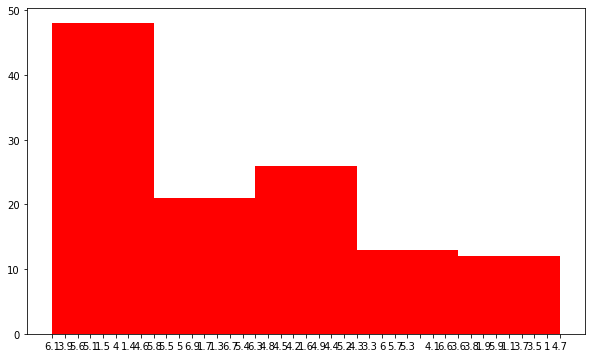

11
[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]
10
[19. 29. 10. 11. 12. 14.  7.  6.  4.  8.]


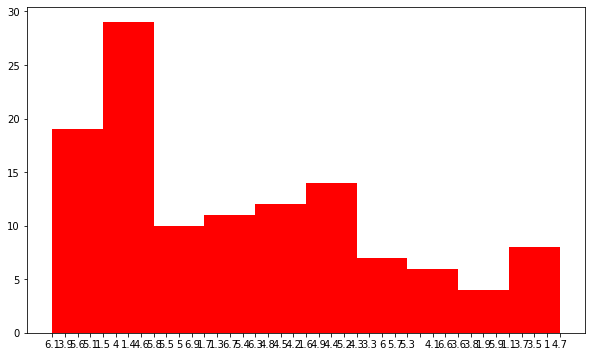

16
[ 0.          2.66666667  5.33333333  8.         10.66666667 13.33333333
 16.         18.66666667 21.33333333 24.         26.66666667 29.33333333
 32.         34.66666667 37.33333333 40.        ]
15
[12. 22. 14.  9.  8.  4.  9. 14.  3.  5.  5.  3.  3.  3.  6.]


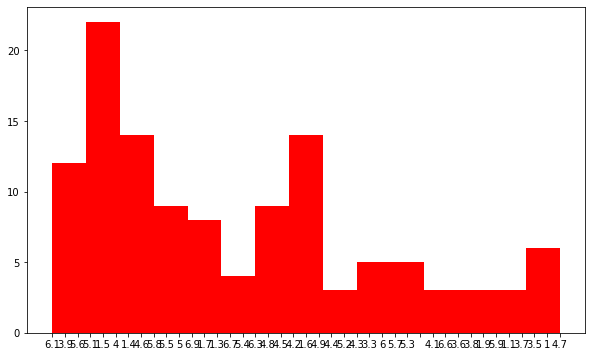

21
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40.]
20
[ 6. 13. 15. 14.  6.  4.  7.  4.  5.  7. 11.  3.  4.  3.  3.  3.  2.  2.
  2.  6.]


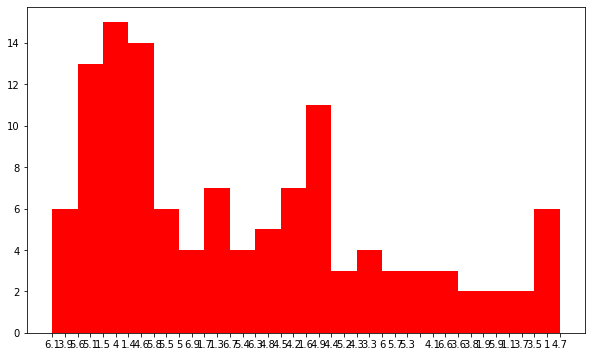

Actual Values: [0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
Predicted Values: [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
Confusion Matrix:
[[ 9  0]
 [ 2 20]]
Class 0
True Positive: 9
False Positive: 2
False Negative: 0
True Negative: 20
Recall: 1.0
Precision: 0.8181818181818182
Balance Accuracy: 0.9545454545454546
F1 Score: 0.9
False Positive Rate: 0.09090909090909091
True Positive Rate: 1.0
ROC: 0.09090909090909091
Class 1
True Positive: 20
False Positive: 0
False Negative: 2
True Negative: 9
Recall: 0.9090909090909091
Precision: 1.0
Balance Accuracy: 0.9545454545454546
F1 Score: 0.9523809523809523
False Positive Rate: 0.0
True Positive Rate: 0.9090909090909091
ROC: 0.0


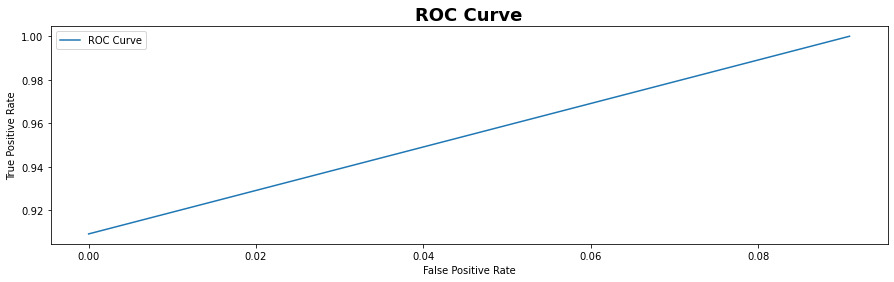

Accuracy: 0.9354838709677419


In [9]:
# Working with discretize 
from sklearn.model_selection import train_test_split   

training_set, testing_set = train_test_split(list, test_size=0.2, random_state=1)

default  = mostCommonClass(training_set)
tree = ID3(training_set,default)
print('Tree Attribute:',tree.attribute)
print('Tree Attribute Values:',tree.attribute_values)
print('Tree Lable:',tree.label)

#feature columns
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'sepal width (cm)', 'petal width (cm)']#,'Categories']


barchart = [training_set[i][tree.attribute] for i in range(len(training_set))]
for i in range(5,25,5):    
    plt.figure(figsize=(10, 6))
    (n1, x1, patches1) = plt.hist(barchart, bins=i,color='red')  
    print(len(x1))
    print(x1)
    print(len(n1))
    print(n1)
    plt.show()

accuracy1(tree,testing_set)
acc = accuracy(tree,testing_set)
print('Accuracy:',acc)

In [5]:
# Combine Data to Target 
def combineXY(data, target):
    target = [1 if e == 2 else e for e in target]
    return np.concatenate((data, np.array([target]).T), axis=1)

5000
5000
#####For Bin##### 5
#####For Column##### 0


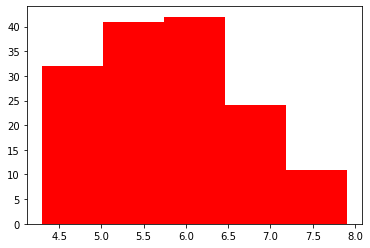

<Figure size 720x432 with 0 Axes>

#####For Column##### 1


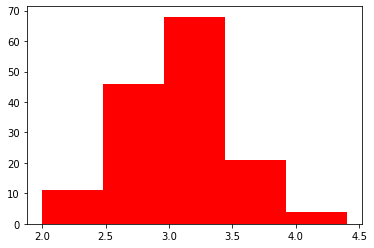

<Figure size 720x432 with 0 Axes>

#####For Column##### 2


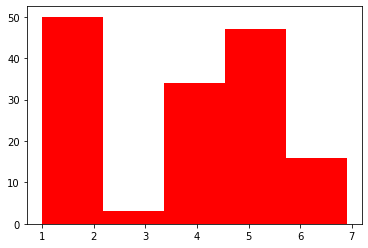

<Figure size 720x432 with 0 Axes>

#####For Column##### 3


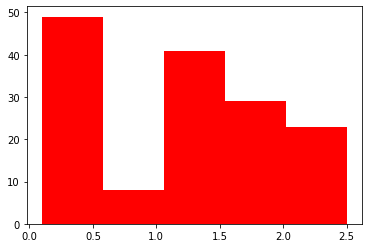

<Figure size 720x432 with 0 Axes>

Bins len: 6
Bins [0.1  0.58 1.06 1.54 2.02 2.5 ]
Frequency Length: 5
Frequency: [49.  8. 41. 29. 23.]
1.0
Tree Attribute: Sepal width
Tree Attribute Values: {2.7199999999999998, 3.6800000000000006, 3.2, 2.24, 4.16, 4.4, 2.0}
Tree Lable: 1.0
YP [0.07142857142857142, 0.5, 0.17857142857142858, 0.25]
Actual Values: [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
Predicted Values: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]
Confusion Matrix:
[[ 2  0]
 [ 9 17]]
Class 27
True Positive: 2
False Positive: 0
False Negative: 9
True Negative: 17
Recall: 0.18181818181818182
Precision: 1.0
Balance Accuracy: 0.5909090909090909
F1 Score: 0.3076923076923077
False Positive Rate: 0.0
True Positive Rate: 0.18181818181818182
ROC: 0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

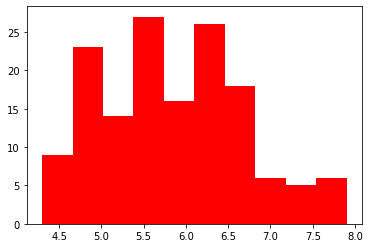

<Figure size 720x432 with 0 Axes>

#####For Column##### 1


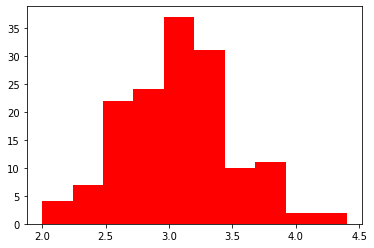

<Figure size 720x432 with 0 Axes>

#####For Column##### 2


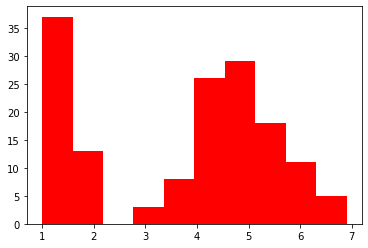

<Figure size 720x432 with 0 Axes>

#####For Column##### 3


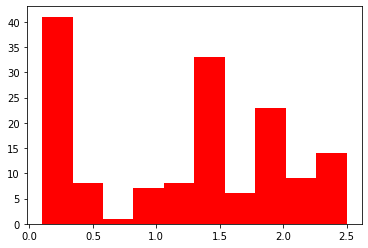

<Figure size 720x432 with 0 Axes>

Bins len: 11
Bins [0.1  0.34 0.58 0.82 1.06 1.3  1.54 1.78 2.02 2.26 2.5 ]
Frequency Length: 10
Frequency: [41.  8.  1.  7.  8. 33.  6. 23.  9. 14.]
1.0
Tree Attribute: Sepal length
Tree Attribute Values: {4.84, 5.92, 6.279999999999999, 5.5600000000000005, 6.1, 7.720000000000001, 5.199999999999999, 6.640000000000001, 7.0, 7.359999999999999, 4.48, 4.3}
Tree Lable: 1.0
YP [0.10344827586206896, 0.06896551724137931, 0.3103448275862069, 0.034482758620689655, 0.10344827586206896, 0.10344827586206896, 0.06896551724137931, 0.10344827586206896, 0.034482758620689655, 0.034482758620689655, 0.034482758620689655]
Actual Values: [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
Predicted Values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Confusion Matrix:
[[ 1  0]
 [10 18]]
Class 28
True Positive: 1
Fals

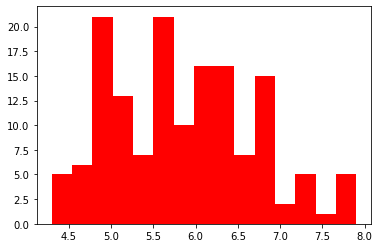

<Figure size 720x432 with 0 Axes>

#####For Column##### 1


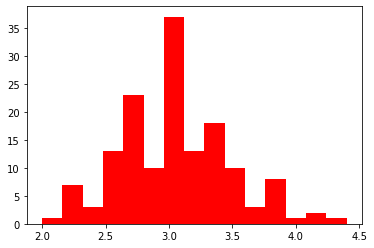

<Figure size 720x432 with 0 Axes>

#####For Column##### 2


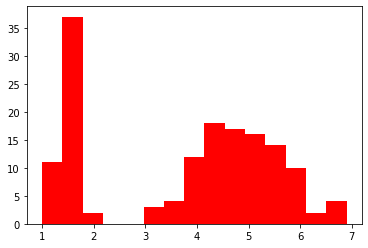

<Figure size 720x432 with 0 Axes>

#####For Column##### 3


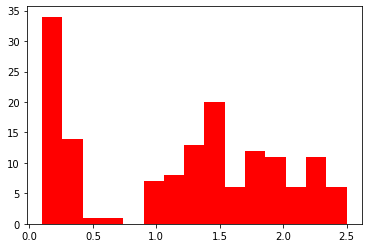

<Figure size 720x432 with 0 Axes>

Bins len: 16
Bins [0.1  0.26 0.42 0.58 0.74 0.9  1.06 1.22 1.38 1.54 1.7  1.86 2.02 2.18
 2.34 2.5 ]
Frequency Length: 15
Frequency: [34. 14.  1.  1.  0.  7.  8. 13. 20.  6. 12. 11.  6. 11.  6.]
1.0
Tree Attribute: Petal length
Tree Attribute Values: {1.5899999999999999, 1.1966666666666668, 3.95, 4.736666666666667, 5.523333333333333, 5.916666666666668, 5.130000000000001, 6.9, 6.703333333333333, 6.3100000000000005, 4.343333333333334, 3.1633333333333336, 1.9833333333333334, 1.0, 3.5566666666666666}
Tree Lable: 1.0
YP [0.16666666666666666, 0.03333333333333333, 0.23333333333333334, 0.03333333333333333, 0.06666666666666667, 0.1, 0.03333333333333333, 0.16666666666666666, 0.03333333333333333, 0.06666666666666667, 0.06666666666666667]
Actual Values: [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
Predicted Values: [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0

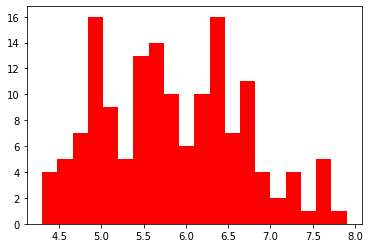

<Figure size 720x432 with 0 Axes>

#####For Column##### 1


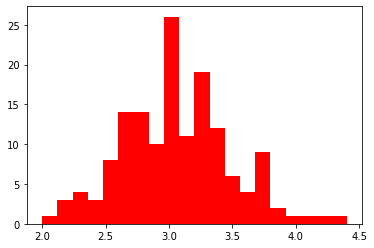

<Figure size 720x432 with 0 Axes>

#####For Column##### 2


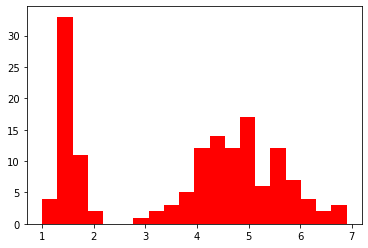

<Figure size 720x432 with 0 Axes>

#####For Column##### 3


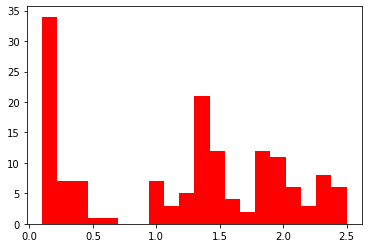

<Figure size 720x432 with 0 Axes>

Bins len: 21
Bins [0.1  0.22 0.34 0.46 0.58 0.7  0.82 0.94 1.06 1.18 1.3  1.42 1.54 1.66
 1.78 1.9  2.02 2.14 2.26 2.38 2.5 ]
Frequency Length: 20
Frequency: [34.  7.  7.  1.  1.  0.  0.  7.  3.  5. 21. 12.  4.  2. 12. 11.  6.  3.
  8.  6.]
1.0
Tree Attribute: Petal length
Tree Attribute Values: {1.4425, 1.7375000000000003, 3.8025, 4.982500000000001, 4.687500000000001, 5.572500000000001, 6.1625000000000005, 4.0975, 5.867500000000001, 6.9, 6.7525, 5.277500000000001, 4.392500000000001, 6.4575000000000005, 1.0, 3.2125000000000004, 3.5075000000000003, 1.1475, 2.0325}
Tree Lable: 1.0
YP [0.06666666666666667, 0.03333333333333333, 0.2, 0.2, 0.03333333333333333, 0.06666666666666667, 0.1, 0.03333333333333333, 0.06666666666666667, 0.03333333333333333, 0.1, 0.06666666666666667]
Actual Values: [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
Predicted Values: [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.

In [70]:
## Recursion Dying Here
print(sys.getrecursionlimit())
sys.setrecursionlimit(5000)
print(sys.getrecursionlimit())
accuracy_list = []
F1_score_list = []
fpr_list = []
tnr_list = []
roc_point_FPR_list = []
roc_point_TPR_list = []

dataset_with_bins = []
for i in range(5, 25, 5):    
    iris = datasets.load_iris()
    iris_data = iris.data
    print('#####For Bin#####', i)
    for col in range(4):
        print('#####For Column#####', col)
        (frequency, bins, patches1) = plt.hist(iris_data[:, col], bins=i, color='red')
        plt.figure(figsize=(10, 6))
        plt.show()
        for datapoint in range(len(iris_data[:, col])):
            for v in range(len(bins) - 1):
                if iris_data[:, [col][0]][datapoint] > bins[v] and iris_data[:, [col][0]][datapoint] < bins[v + 1]:
                    iris_data[:, [col][0]][datapoint] = (bins[v] + bins[v + 1]) / 2
                    break

    print('Bins len:', len(bins))
    print('Bins', bins)
    print('Frequency Length:', len(frequency))
    print('Frequency:', frequency)
    finalresult = combineXY(iris_data, iris.target)
    dataset_with_bins.append(finalresult)
    # print(finalresult)

    col_label = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']
    final_dictionary = []
    for data in finalresult:
        final_dictionary.append(dict(zip(col_label, data)))
    # print(final_dictionary)

    training_set, testing_set = train_test_split(final_dictionary, test_size=0.2, random_state=1)
    deafult1 = mostCommonClass(training_set)
    print(deafult1)
    tree = ID3(training_set, deafult1, inserted=[])
    print('Tree Attribute:', tree.attribute)
    print('Tree Attribute Values:', tree.attribute_values)
    print('Tree Lable:', tree.label)
    f_score, fpr, tnr, roc_point_FPR,roc_point_TPR = accuracy1(tree, testing_set)
    print('F1 Score:',f_score)
    F1_score_list.append(f_score)
    fpr_list.append(fpr)
    tnr_list.append(tnr)
    roc_point_FPR_list.append(roc_point_FPR[:])
    roc_point_TPR_list.append(roc_point_TPR[:])
    acc = accuracy(tree, testing_set)
    print('Accuracy:', acc)
    accuracy_list.append(acc)
    

In [71]:
print('########Accuracy List#########')    
minimum_accuracy = min(accuracy_list)    
maximum_accuracy = max(accuracy_list)
print('Minimum Accuracy:',minimum_accuracy)
print('Maximum Accuracy:',maximum_accuracy)
print('Average Accuracy:',sum(accuracy_list)/len(accuracy_list))

########Accuracy List#########
Minimum Accuracy: 0.6333333333333333
Maximum Accuracy: 1.0
Average Accuracy: 0.8166666666666667


[0.3076923076923077, 0.16666666666666669, 1.0, 1.0]


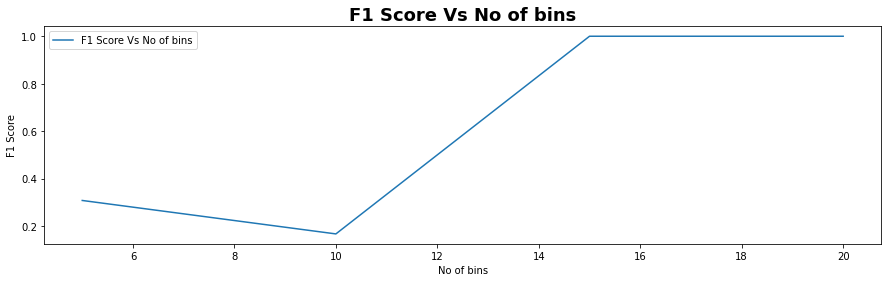

In [72]:
print(F1_score_list)    
plt.figure(figsize=(15, 4))
plt.title('F1 Score Vs No of bins', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.plot(np.arange(5,25,5),F1_score_list, label='F1 Score Vs No of bins')
plt.legend()
plt.xlabel('No of bins')
plt.ylabel('F1 Score')
plt.savefig('roc', dpi=100)
plt.show()

[0.6333333333333333, 0.6333333333333333, 1.0, 1.0]


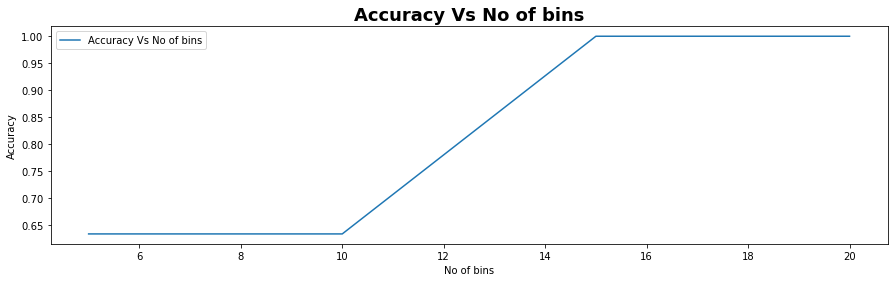

In [73]:
print(accuracy_list)
plt.figure(figsize=(15, 4))
plt.title('Accuracy Vs No of bins', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.plot(np.arange(5,25,5),accuracy_list, label='Accuracy Vs No of bins')
plt.legend()
plt.xlabel('No of bins')
plt.ylabel('Accuracy')
plt.savefig('roc', dpi=100)
plt.show() 

[0.0, 0.0, 0.0, 0.0]
[0.18181818181818182, 0.09090909090909091, 1.0, 1.0]


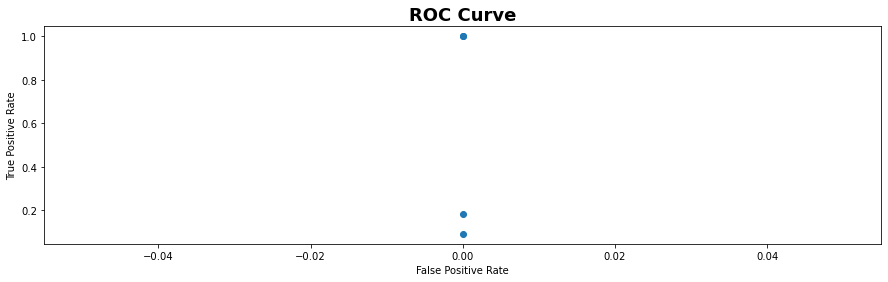

In [74]:
# Combine fpr and tnr for each discretize 
print(fpr_list)
print(tnr_list)
plt.figure(figsize=(15, 4))
plt.title('ROC Curve', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.scatter(fpr_list,tnr_list)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc', dpi=100)
plt.show() 

[0.0, 0.0, 0.0, 0.0]
[0.18181818181818182, 0.09090909090909091, 1.0, 1.0]


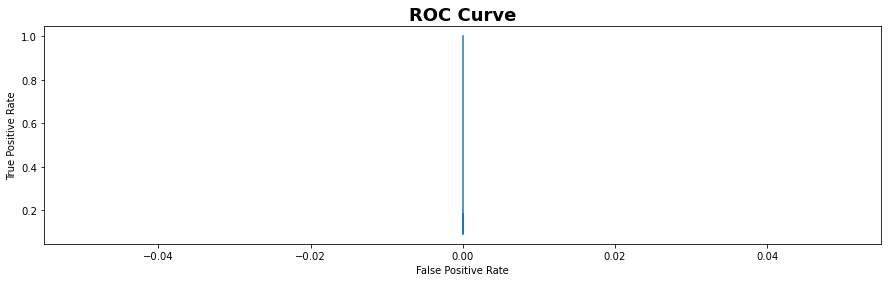

In [75]:
# Combine fpr and tnr for each discretize 
print(fpr_list)
print(tnr_list)
plt.figure(figsize=(15, 4))
plt.title('ROC Curve', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.plot(fpr_list,tnr_list)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc', dpi=100)
plt.show() 

In [76]:
f_list = []
t_list = []
for i in range(len(roc_point_FPR_list)):
    for j in range(len(roc_point_FPR_list[i])):
        f_list.append(roc_point_FPR_list[i][j])
        t_list.append(roc_point_TPR_list[i][j])

print(f_list)    
print(t_list)  
print(len(f_list))    
print(len(t_list))    

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18181818181818182, 0.36363636363636365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.45454545454545453]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.038461538461538464, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.11538461538461539, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.03571428571428571, 0.17857142857142858, 0.39285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842, 0.05263157894736842, 0.3684210526315789, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842, 0.3684210526315789]
44
44


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18181818181818182, 0.36363636363636365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.45454545454545453]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.038461538461538464, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.11538461538461539, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.03571428571428571, 0.17857142857142858, 0.39285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842, 0.05263157894736842, 0.3684210526315789, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842, 0.3684210526315789]
44
44


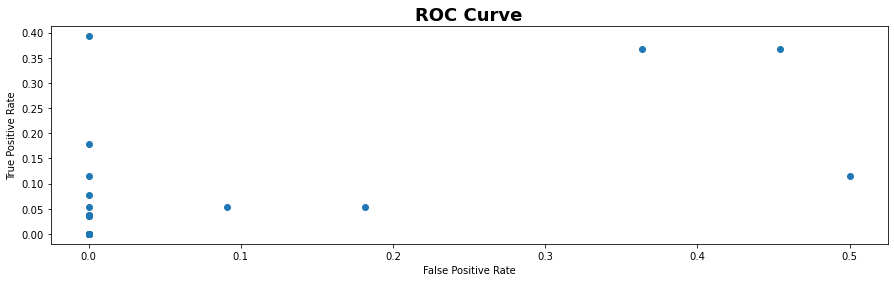

In [77]:
print(f_list)    
print(t_list)  
print(len(f_list))    
print(len(t_list)) 
plt.figure(figsize=(15, 4))
plt.title('ROC Curve', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.scatter(f_list,t_list)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc', dpi=100)
plt.show() 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18181818181818182, 0.36363636363636365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.45454545454545453]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.038461538461538464, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.11538461538461539, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.03571428571428571, 0.17857142857142858, 0.39285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842, 0.05263157894736842, 0.3684210526315789, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842, 0.3684210526315789]
44
44


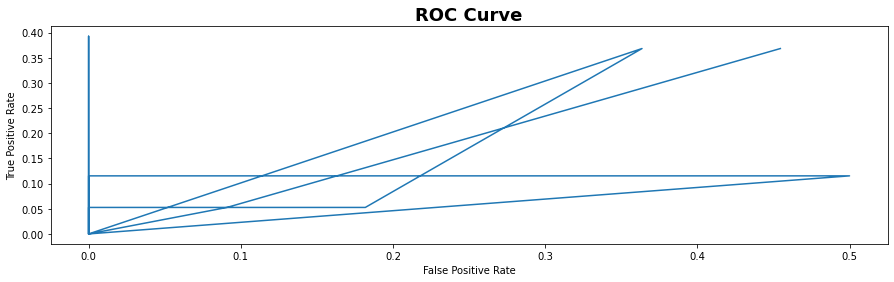

In [78]:
print(f_list)    
print(t_list)  
print(len(f_list))    
print(len(t_list)) 
plt.figure(figsize=(15, 4))
plt.title('ROC Curve', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.plot(f_list,t_list)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc', dpi=100)
plt.show() 

1.0
Tree Attribute: Sepal width
Tree Attribute Values: {2.7199999999999998, 3.6800000000000006, 3.2, 2.24, 4.16, 4.4, 2.0}
Tree Lable: 1.0
Actual Values: [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]
Predicted Values: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Confusion Matrix:
[[ 2  0]
 [ 9 17]]
Class 0
True Positive: 2
False Positive: 9
False Negative: 0
True Negative: 17
Recall: 1.0
Precision: 0.18181818181818182
Balance Accuracy: 0.8269230769230769
F1 Score: 0.3076923076923077
False Positive Rate: 0.34615384615384615
True Positive Rate: 1.0
ROC: 0.34615384615384615
Class 1
True Positive: 17
False Positive: 0
False Negative: 9
True Negative: 2
Recall: 0.6538461538461539
Precision: 1.0
Balance Accuracy: 0.8269230769230769
F1 Score: 0.7906976744186047
False Positive Rate: 0.0
True Positive Rate: 0.6538461538461539
ROC: 0.0


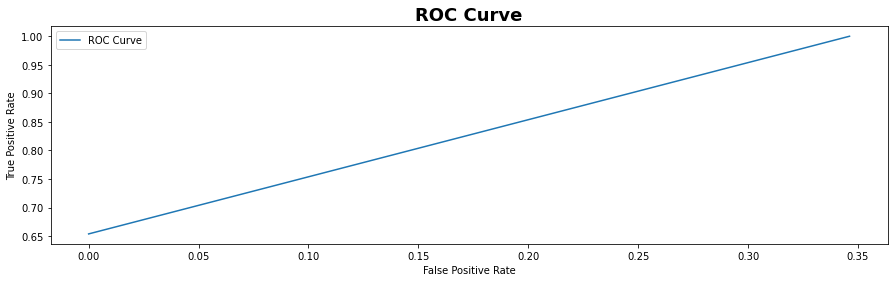

Accuracy: 0.6333333333333333


In [39]:
# Showing Dead Kernel after running this section 
deafult1 = mostCommonClass(training_set)
print(deafult1)
tree = ID3(training_set, deafult1, inserted=[])
print('Tree Attribute:', tree.attribute)
print('Tree Attribute Values:', tree.attribute_values)
print('Tree Lable:', tree.label)

accuracy1(tree, testing_set)
acc = accuracy(tree, testing_set)
print('Accuracy:', acc)
